# Load data

/var/folders/t8/0vpf6dyn0q111yjvx8dbs7dc0000gn/T/ipykernel_64279/2470724606.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


PR Evidence          0.694444
bias_highbaserate    0.527778
pre_map_change       0.916667
post_map_change      0.472222
two_step_planning    0.638889
dtype: float64


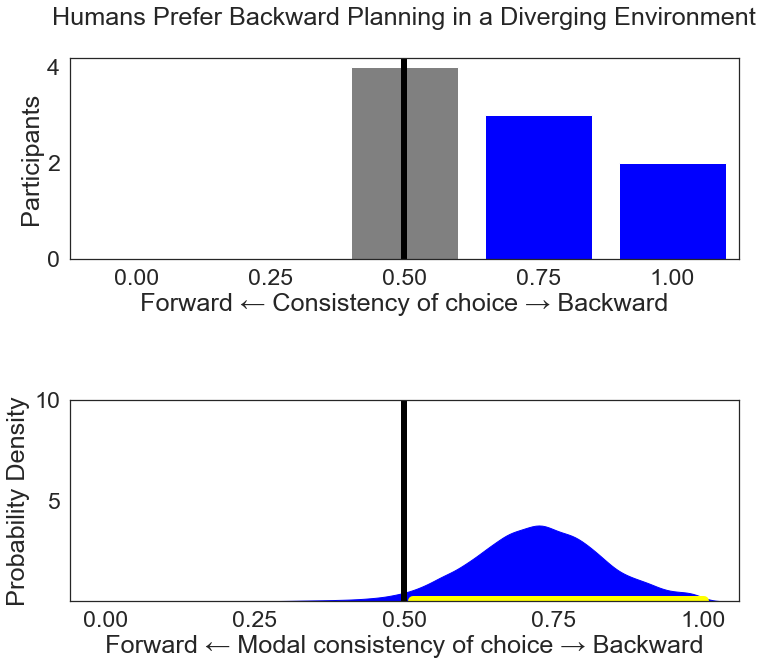

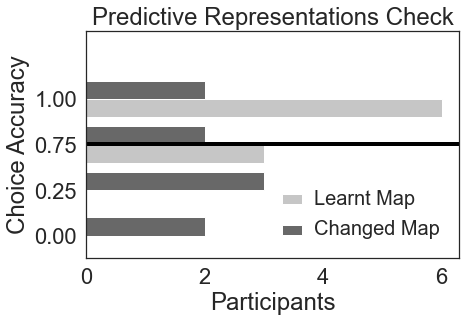

In [34]:
#load dependencies
import numpy as np
from IPython.display import Image
from matplotlib import gridspec
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='white', palette='Set2', font='arial', font_scale=1.0, rc=None)

df=pd.read_csv('all_planning_questions_baseratebias.csv') #load data
print(df.mean())

#print means of each key variable

rr_map=round(df['pre_map_change']*4,2)
rr_map = rr_map.astype(int)

twostepplan=round(df['two_step_planning']*4,2)
twostepplan = twostepplan.astype(int)


tr_changed_map=round(df['post_map_change']*4,2)
tr_changed_map = tr_changed_map.astype(int)

br_bias=round(df['bias_highbaserate']*4,2)
br_bias = br_bias.astype(int)

PR_evidence=round(df['PR Evidence']*4,2)
PR_evidence = PR_evidence.astype(int)

n_subjects = len(df)

subjects= [*range(n_subjects)]

# rr_map=df['pre_map_change']*4
# tr_changed_map=df['post_map_change']*4
sns.set(style='white', font='arial', font_scale=2.1, rc={'figure.figsize':(12,10)})


fig, axes = plt.subplots(2, 1)

x=sns.countplot(x="PR Evidence", palette='Blues',data=df,ax=axes[0],order = [x/4 for x in range(0,5)])

y=sns.kdeplot(data=df_posterior, x=('posterior', 'omega'),ax=axes[1],fill=True,alpha=1,color='blue')
axes[0].set_ylabel('Participants')
axes[0].bar(df["PR Evidence"].unique()*4, df["PR Evidence"].value_counts(sort=False), color=['gray', 'blue', 'blue','blue','blue'])
axes[0].set_xlabel('Forward \u2190 Consistency of choice \u2192 Backward')
axes[0].set_xlim(-0.5, 4.5)
# axes[0].xaxis.set_major_formatter('{x:.1f}')
axes[0].set_title('Humans Prefer Backward Planning in a Diverging Environment\n')

axes[0].axvline(2,color='black',linewidth=6.0)
axes[1].set_ylim
axes[1].set_ylabel('Probability Density')
axes[1].set_xlabel('Forward \u2190 Modal consistency of choice \u2192 Backward')
axes[1].axvline(0.5,color='black',linewidth=6.0)
axes[1].axhline(y=0,xmin=0.513443,xmax=0.947,color='yellow',linewidth=10.0)
axes[1].set_xlim(-0.06,1.06)

plt.sca(axes[1])
plt.yticks([5,10])
plt.xticks([0,0.25,0.5,0.75,1.00])
axes[0].margins(x=0)
axes[1].margins(x=0)
axes[0].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[0].get_xticklabels()])

axes[1].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[1].get_xticklabels()])

fig.subplots_adjust(hspace=0.7)

plt.savefig('study5_PRevidence.png',dpi=300)

plt.show()

sns.set(style='white', font='arial', font_scale=2, rc={'figure.figsize':(7,5)})
fig, ax = plt.subplots()
#sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sns.set(style='white', font='arial', font_scale=2, rc={'figure.figsize':(7,5)})

#load data
df_new=pd.DataFrame()
df_new['Revaluation Score']=df['pre_map_change'].values.tolist()+df['post_map_change'].values.tolist()
df_new['']=['Learnt Map']*len(df)+['Changed Map']*len(df)                              
#plot transition revaluation performance

ax=sns.countplot(data=df_new, y="Revaluation Score",hue="",palette='Greys',orient='v')
plt.xlabel('Participants')

ax.set_ylim(-0.5,4.5)
ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])

ax.set_ylim(-0.5,4.5)
ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])

plt.axhline(2,color='black',linewidth=4.0)
sns.move_legend(ax, "lower right",frameon=False)

# Change the font size of the legend text
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_fontsize(20)

# Change the size and spacing of the legend bars
for patch in leg.get_patches():
    patch.set_height(10)
    patch.set_width(20)
    patch.set_x(patch.get_x() + 30) # adjust the y position of the bars


# for tick in ax.get_xaxis().get_major_ticks():
#     tick.set_pad(8.)

plt.ylabel('Choice Accuracy')
plt.title('Predictive Representations Check')

plt.tight_layout()

plt.savefig('study2_post_map_change.png',dpi=300)
plt.show()
# Print 0.1*SD of PR Evidence to define the ROPE



# Fit Model for Hypothesis 1: Evidence for PR-based Planning

Below we fit the beta-binomial described in text to choice data for Variable 1, which defines the number of times participants chose in line with PR-based planning. If omega, the mode of the group distribution, is estimated to be significantly greater than 0.5 (no evidence of PR-based planning), then we conclude evidence for our main hypothesis.

We followed Kruschke’s (2014) guidelines to derive the ROPE, wherein we took the standard deviation of the percentage of times subjects chose in line with PR-based planning and multiplied this value by 0.1 , which was 0.18, and multiplied this by 0.1, to define effects that are too small to be considered significant. We then rounded this up to 0.2 to make it even a bit more conservative than Kruschke’s (2014) recommendation. We use this ROPE for all subsequent analyses.

Note below, we fit the same model to the two subsequent manipulation checks, except include different variables (specifically, variables 3 and 5 as described in the preregistration).

In [17]:
n_subjects = n_subjects
subjects= [*range(n_subjects)]
with pm.Model() as hierarchical_model:

    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)


    y = pm.Binomial('y',n=4,p=theta[subjects], observed=PR_evidence) 
    
with hierarchical_model:
    trace_main = pm.sample(draws=4000, target_accept=0.99,init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 91 seconds.


In [5]:
import arviz as az
az.summary(trace_main, ['omega'],hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
omega  0.722  0.113     0.513      0.955      0.002    0.001    4657.0   

       ess_tail  r_hat  
omega    4507.0    1.0

In [6]:
df_posterior=trace_main.to_dataframe()
df_posterior.to_csv('posterior_model.csv')

# Fit model for manipulation check 1: Bias for high base-rate action?

In [24]:
n_subjects = n_subjects
subjects= [*range(n_subjects)]
with pm.Model() as hierarchical_model:

    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)


    y = pm.Binomial('y',n=4,p=theta[subjects], observed=br_bias) 
    
with hierarchical_model:
    trace = pm.sample(draws=4000, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 98 seconds.


In [35]:
az.summary(trace,var_names=['omega'],hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
omega  0.53  0.117     0.303      0.766      0.002    0.001    5036.0   

       ess_tail  r_hat  
omega    6531.0    1.0

In [29]:
df_posterior_distal=trace.to_dataframe()

# Evidence of two step planning

In [36]:
n_subjects = n_subjects
subjects= [*range(n_subjects)]
with pm.Model() as hierarchical_model:

    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)


    y = pm.Binomial('y',n=4,p=theta[subjects], observed=twostepplan) 
    
with hierarchical_model:
    trace_twostep = pm.sample(draws=4000, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 87 seconds.


In [38]:
az.summary(trace_twostep,var_names=['omega'],hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
omega  0.658  0.125     0.423      0.919      0.002    0.001    4070.0   

       ess_tail  r_hat  
omega    3559.0    1.0

## Plot posterior for omega: The highest-density interval (black line) in the posterior does not include 0.3 or 0.7. 

Manipulation check passed!

/var/folders/t8/0vpf6dyn0q111yjvx8dbs7dc0000gn/T/ipykernel_64279/3695311935.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])


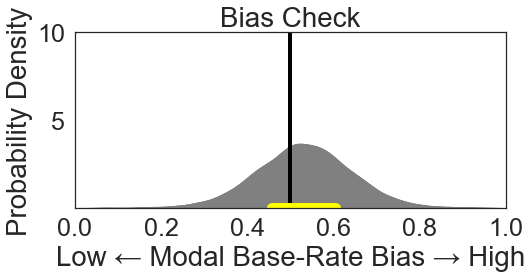

In [30]:
sns.set(style='white', font='arial', font_scale=2.3, rc={'figure.figsize':(8,4.5)})
fig, ax = plt.subplots()

x=sns.kdeplot(data=df_posterior_distal, x=('posterior', 'omega'),fill=True,alpha=1,color="gray")

y=sns.kdeplot(data=df_posterior_distal, x=('posterior', 'omega'),fill=True,alpha=1,color="gray")
ax.set_ylabel('Probability Density')
ax.set_xlabel('Low \u2190 Modal Base-Rate Bias \u2192 High')
ax.set_xlim(0,1.0)
ax.set_yticks([5,10])

ax.axvline(0.5,color='black',linewidth=4.0)

ax.set_title('Bias Check')
ax.axhline(y=0,xmin=0.457,xmax=0.606,color='yellow',linewidth=10.0)



ax.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])

plt.tight_layout()

plt.savefig('study2_action_distal_bias.png',dpi=300)
plt.show()

# Post-Map Change Performance

In [31]:
subjects= [*range(n_subjects)]

with pm.Model() as hierarchical_model:
    alpha = pm.Gamma('alpha', 1.105125 , 0.1051249)
    beta = pm.Gamma('beta', 1.105125 , 0.1051249)
    
    theta = pm.Beta('theta', alpha=alpha+1, beta=beta+1, shape=n_subjects)

    y = pm.Binomial('y',n=4,p=theta[subjects], observed=tr_changed_map) 
    
with hierarchical_model:
    trace_changed_map = pm.sample(draws=4000, target_accept=0.999,init='adapt_diag')


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 160 seconds.


In [33]:
import arviz as az
mean_tr=trace_changed_map.posterior.alpha.values/(trace_changed_map.posterior.alpha.values+trace_changed_map.posterior.beta.values)
az.summary(mean_tr,hdi_prob=0.95)

mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x  0.468  0.14     0.171      0.748      0.002    0.001    7172.0    7041.0   

   r_hat  
x    1.0

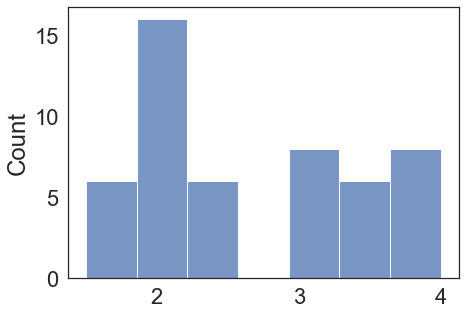

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 137 seconds.


In [46]:
difference_reval=(((rr_map-tr_changed_map))+4.0)/2.0
sns.histplot(difference_reval)
plt.show()
subjects= [*range(n_subjects)]

with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)
    y = pm.Binomial('y',n=4,p=theta[subjects], observed=difference_reval) 
    
with hierarchical_model:
    diff_reval = pm.sample(draws=4000, target_accept=0.999,init='adapt_diag')

In [47]:
import arviz as az
# diff_tr=diff_reval.posterior.alpha.values/(diff_reval.posterior.alpha.values+diff_reval.posterior.beta.values)
az.summary(diff_reval,['omega'],hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
omega  0.634  0.044     0.551       0.72      0.001    0.001    3379.0   

       ess_tail  r_hat  
omega    6445.0    1.0

In [14]:
print(trace_main.posterior.omega.values.flatten())

[0.71505268 0.59887425 0.700989   ... 0.70126154 0.81673006 0.8672439 ]


In [21]:
successes=0 #number of times posterior did not include key value from ROPE
num_iterations=100
sample_size=75
for i in range(num_iterations): # fit model 300 times
    sample_omega=np.random.choice(trace_main.posterior.omega.values.flatten(), size=1)[0]
    sample_kappa=np.random.choice(trace_main.posterior.kappa.values.flatten(),size=1)[0]
    sample_alpha=sample_omega*(sample_kappa-2)+1
    sample_beta=(1-sample_omega)*(sample_kappa-2)+1

    thetas=np.random.beta(sample_alpha,sample_beta,sample_size)
    sample_data=[]
    for theta in thetas:
        sample_data.append(np.random.binomial(4,theta,1))
    subjects= [*range(sample_size)] 
    with pm.Model() as hierarchical_model:
        omega_s = pm.Beta('omega_s', 1., 1.)
        kappa_minus2_s = pm.Gamma('kappa_minus2_s', 1.105125 , 0.1051249, transform=None)
        kappa_s = pm.Deterministic('kappa_s', kappa_minus2_s + 2)

        theta_s = pm.Beta('theta_s', alpha=omega_s*(kappa_s-2)+1, beta=(1-omega_s)*(kappa_s-2)+1, shape=sample_size)

        y = pm.Binomial('y',n=4,p=theta_s[subjects], observed=sample_data) 

    with hierarchical_model:
        trace_s = pm.sample(draws=2000, target_accept=0.90,init='adapt_diag',progressbar = False)
    
    df_summary_s=az.summary(trace_s,var_names=['omega_s'],hdi_prob=0.95)
    if df_summary_s['hdi_2.5%'].values[0]>0.50:
        print('success')
        successes+=1
    else:
        print('failed')

bayesian_power=successes/num_iterations


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 62 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 70 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 62 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 70 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 67 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 63 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 64 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 61 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 61 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 60 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 62 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


failed


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


failed


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 68 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 61 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 61 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 59 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


failed


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


failed


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 59 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega_s, kappa_minus2_s, theta_s]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.


success


In [22]:
print(bayesian_power)

0.96
